<a href="https://colab.research.google.com/github/Hansol03/Relation-analysis-of-temp-hum-in-rubber-belt-manufacturing-process-/blob/main/temp_humi.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## 1. 데이터 불러오기 

In [1]:
# 코랩에 한글 폰트가 없을 경우 
# 한글 폰트 설치 
#!sudo apt-get install -y fonts-nanum
#!sudo fc-cache -fv
#!rm ~/.cache/matplotlib -rf

In [2]:
# 구글 코랩 드라이브 마운트 
# 매번 파일 업로드할 필요 없이 구글드라이브에서 바로 파일을 가져올 수 있음 
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
# 액셀 데이터 불러오기
# 온습도 데이터 시트 불러오기  
import numpy as np 
import pandas as pd 

df = pd.read_excel(io='/content/drive/MyDrive/프로젝트범블비 데이터플젝 /data.xlsx', sheet_name = 'data')
df.head()

,순번,시간,Unnamed: 2,태그,Unnamed: 4,태그명,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,Unnamed: 10
0,9.0,2022-07-14 16:00:00,NaN,TC1_HUMI,NaN,60.2,2022-07-14 16:00:00,NaN,TC1_TEMP,NaN,32.1
1,10.0,2022-07-14 18:00:00,NaN,TC1_HUMI,NaN,55.0,2022-07-14 18:00:00,NaN,TC1_TEMP,NaN,31.0
2,11.0,2022-07-14 20:00:00,NaN,TC1_HUMI,NaN,53.7,2022-07-14 20:00:00,NaN,TC1_TEMP,NaN,30.1
3,12.0,2022-07-14 22:00:00,NaN,TC1_HUMI,NaN,56.3,2022-07-14 22:00:00,NaN,TC1_TEMP,NaN,29.8
4,13.0,2022-07-15 00:00:00,NaN,TC1_HUMI,NaN,59.4,2022-07-15 00:00:00,NaN,TC1_TEMP,NaN,29.2


In [4]:
df.columns

Index(['순번', '시간', 'Unnamed: 2', '태그', 'Unnamed: 4', '태그명', 'Unnamed: 6',
       'Unnamed: 7', 'Unnamed: 8', 'Unnamed: 9', 'Unnamed: 10'],
      dtype='object')

In [5]:
# 열 이름을 데이터에 맞게 변경 
df.rename(columns={'태그':'HUMI', '태그명':'습도','Unnamed: 6':'시간2','Unnamed: 8':'TEMP', 'Unnamed: 10':'온도'}, inplace=True) 
df

,순번,시간,Unnamed: 2,HUMI,Unnamed: 4,습도,시간2,Unnamed: 7,TEMP,Unnamed: 9,온도
0,9.0,2022-07-14 16:00:00,NaN,TC1_HUMI,NaN,60.2,2022-07-14 16:00:00,NaN,TC1_TEMP,NaN,32.1
1,10.0,2022-07-14 18:00:00,NaN,TC1_HUMI,NaN,55.0,2022-07-14 18:00:00,NaN,TC1_TEMP,NaN,31.0
2,11.0,2022-07-14 20:00:00,NaN,TC1_HUMI,NaN,53.7,2022-07-14 20:00:00,NaN,TC1_TEMP,NaN,30.1
3,12.0,2022-07-14 22:00:00,NaN,TC1_HUMI,NaN,56.3,2022-07-14 22:00:00,NaN,TC1_TEMP,NaN,29.8
4,13.0,2022-07-15 00:00:00,NaN,TC1_HUMI,NaN,59.4,2022-07-15 00:00:00,NaN,TC1_TEMP,NaN,29.2
...,...,...,...,...,...,...,...,...,...,...,...
1083,1092.0,2022-10-12 22:00:00,NaN,TC1_HUMI,NaN,46.1,2022-10-12 22:00:00,NaN,TC1_TEMP,NaN,23.1
1084,1093.0,2022-10-13 00:00:00,NaN,TC1_HUMI,NaN,46.5,2022-10-13 00:00:00,NaN,TC1_TEMP,NaN,22.8
1085,1094.0,2022-10-13 02:00:00,NaN,TC1_HUMI,NaN,47.3,2022-10-13 02:00:00,NaN,TC1_TEMP,NaN,22.4
1086,1095.0,2022-10-13 04:00:00,NaN,TC1_HUMI,NaN,47.6,2022-10-13 04:00:00,NaN,TC1_TEMP,NaN,22.5


In [6]:
# 필요 없는 열은 제거 
df.drop(['Unnamed: 2', 'Unnamed: 4', 'Unnamed: 7', '시간2','Unnamed: 9'], axis=1, inplace=True) 
df.columns

Index(['순번', '시간', 'HUMI', '습도', 'TEMP', '온도'], dtype='object')

In [7]:
# 데이터를 맨 앞에서부터 5개 행 출력 
df.head()

,순번,시간,HUMI,습도,TEMP,온도
0,9.0,2022-07-14 16:00:00,TC1_HUMI,60.2,TC1_TEMP,32.1
1,10.0,2022-07-14 18:00:00,TC1_HUMI,55.0,TC1_TEMP,31.0
2,11.0,2022-07-14 20:00:00,TC1_HUMI,53.7,TC1_TEMP,30.1
3,12.0,2022-07-14 22:00:00,TC1_HUMI,56.3,TC1_TEMP,29.8
4,13.0,2022-07-15 00:00:00,TC1_HUMI,59.4,TC1_TEMP,29.2


In [8]:
# 33619-N7 데이터 불러오기 
n7 = pd.read_excel(io='/content/drive/MyDrive/프로젝트범블비 데이터플젝 /data.xlsx', sheet_name = '33619-N7')
n7

,배치번호,배합번호,검사일자,T10_스펙,T10,T90_스펙,T90,무늬_스펙,무늬
0,1.0,33619-N7FMB,2022-10-12,220±40,326.0,410±80,510.0,55±10,56.9
1,3.0,33619-N7FMB,2022-10-12,220±40,291.0,410±80,407.0,NaN,57.0
2,12.0,33619-N7FMB,2022-10-12,220±40,325.0,410±80,469.0,NaN,NaN
3,18.0,33619-N7FMB,2022-10-12,220±40,323.0,410±80,500.0,NaN,NaN
4,24.0,33619-N7FMB,2022-10-12,220±40,330.0,410±80,468.0,NaN,NaN
...,...,...,...,...,...,...,...,...,...
394,3.0,33619-N7FMB,2022-07-18,220±40,310.0,410±80,453.0,NaN,57.7
395,21.0,33619-N7FMB,2022-07-14,220±40,313.0,410±80,453.0,NaN,
396,24.0,33619-N7FMB,2022-07-14,220±40,309.0,410±80,435.0,NaN,55.0
397,27.0,33619-N7FMB,2022-07-14,220±40,318.0,410±80,435.0,NaN,55.4


In [9]:
# 3307-N 데이터 불러오기 
n = pd.read_excel(io='/content/drive/MyDrive/프로젝트범블비 데이터플젝 /data.xlsx', sheet_name = '3307-N')
n.head()

,배치번호,배합번호,검사일자,T10_스펙,T10,T90_스펙,T90,무늬_스펙,무늬
0,15.0,3307-NFMB,2022-10-11,330±40,NaN,710±100,NaN,75±10,NaN
1,1.0,3307-NCMB,2022-10-10,330±40,NaN,710±100,NaN,NaN,89.2
2,5.0,3307-NCMB,2022-10-10,330±40,NaN,710±100,NaN,NaN,90.9
3,10.0,3307-NCMB,2022-10-10,330±40,NaN,710±100,NaN,NaN,94.6
4,0.0,3307-NFMB,2022-10-10,330±40,448.0,710±100,787.0,NaN,NaN


In [10]:
#range(data.shape[0]-1, -1)
#range(data.shape[0]-1, -1, -1)
#list(range(data.shape[0]-1, -1, -1))
#r_idx = [i for i in range(data.shape[0]-1, -1, -1)]

## 데이터 전처리 (data preprocessing)  
  

### 데이터 역순으로 정렬   

검사 일자 별 데이터 구성을 취하고자 함   
날짜 순 데이터 구성을 위해 N7과 N은 데이터를 역순으로 만들어야 함   
액셀 데이터 내에서는 날짜 역순으로 정렬되어 있음 

In [11]:
# 인덱스 값 398부터 -1까지 포함하지 않는 범위 생성 
range(n7.shape[0]-1, -1) 


range(398, -1)

In [12]:
# range 범위 다음에 -1 을 넣으면 역순으로 데이터를 이해함 
range(n7.shape[0]-1, -1, -1)

range(398, -1, -1)

In [13]:
# 역순 리스트 변수 생성 
r_idk = [i for i in range(n7.shape[0]-1,-1,-1)] 

In [14]:
# index에 역순으로 만든 index 리스트를 넣어준다 
# 데이터가 거꾸로 정렬됨을 확인 
n7 = pd.DataFrame(n7, index=r_idk)
n7

,배치번호,배합번호,검사일자,T10_스펙,T10,T90_스펙,T90,무늬_스펙,무늬
398,30.0,33619-N7FMB,2022-07-14,220±40,324.0,410±80,453.0,NaN,55.0
397,27.0,33619-N7FMB,2022-07-14,220±40,318.0,410±80,435.0,NaN,55.4
396,24.0,33619-N7FMB,2022-07-14,220±40,309.0,410±80,435.0,NaN,55.0
395,21.0,33619-N7FMB,2022-07-14,220±40,313.0,410±80,453.0,NaN,
394,3.0,33619-N7FMB,2022-07-18,220±40,310.0,410±80,453.0,NaN,57.7
...,...,...,...,...,...,...,...,...,...
4,24.0,33619-N7FMB,2022-10-12,220±40,330.0,410±80,468.0,NaN,NaN
3,18.0,33619-N7FMB,2022-10-12,220±40,323.0,410±80,500.0,NaN,NaN
2,12.0,33619-N7FMB,2022-10-12,220±40,325.0,410±80,469.0,NaN,NaN
1,3.0,33619-N7FMB,2022-10-12,220±40,291.0,410±80,407.0,NaN,57.0


In [15]:
# index 초기화 
n7=n7.reset_index(drop=True) 
n7

,배치번호,배합번호,검사일자,T10_스펙,T10,T90_스펙,T90,무늬_스펙,무늬
0,30.0,33619-N7FMB,2022-07-14,220±40,324.0,410±80,453.0,NaN,55.0
1,27.0,33619-N7FMB,2022-07-14,220±40,318.0,410±80,435.0,NaN,55.4
2,24.0,33619-N7FMB,2022-07-14,220±40,309.0,410±80,435.0,NaN,55.0
3,21.0,33619-N7FMB,2022-07-14,220±40,313.0,410±80,453.0,NaN,
4,3.0,33619-N7FMB,2022-07-18,220±40,310.0,410±80,453.0,NaN,57.7
...,...,...,...,...,...,...,...,...,...
394,24.0,33619-N7FMB,2022-10-12,220±40,330.0,410±80,468.0,NaN,NaN
395,18.0,33619-N7FMB,2022-10-12,220±40,323.0,410±80,500.0,NaN,NaN
396,12.0,33619-N7FMB,2022-10-12,220±40,325.0,410±80,469.0,NaN,NaN
397,3.0,33619-N7FMB,2022-10-12,220±40,291.0,410±80,407.0,NaN,57.0


위와 같은 방법으로 N 데이터도 진행 

In [16]:
range(n.shape[0]-1, -1)
#range(data.shape[0]-1, -1, -1)
#list(range(data.shape[0]-1, -1, -1))
#r_idx = [i for i in range(data.shape[0]-1, -1, -1)]

range(169, -1)

In [17]:
range(n.shape[0]-1, -1, -1)

range(169, -1, -1)

In [18]:
r_idx_n = [i for i in range(n.shape[0]-1, -1, -1)]

In [19]:
n = pd.DataFrame(n, index=r_idx_n)
n

,배치번호,배합번호,검사일자,T10_스펙,T10,T90_스펙,T90,무늬_스펙,무늬
169,25.0,3318-NFMB,2022-07-21,330±40,NaN,710±100,NaN,NaN,92.8
168,15.0,3317-NFMB,2022-07-21,330±40,NaN,710±100,NaN,NaN,96.1
167,5.0,3316-NFMB,2022-07-21,330±40,NaN,710±100,NaN,NaN,95.2
166,1.0,3315-NFMB,2022-07-21,330±40,NaN,710±100,NaN,NaN,92.6
165,9.0,3314-NFMB,2022-07-21,330±40,NaN,710±100,NaN,NaN,73.5
...,...,...,...,...,...,...,...,...,...
4,0.0,3307-NFMB,2022-10-10,330±40,448.0,710±100,787.0,NaN,NaN
3,10.0,3307-NCMB,2022-10-10,330±40,NaN,710±100,NaN,NaN,94.6
2,5.0,3307-NCMB,2022-10-10,330±40,NaN,710±100,NaN,NaN,90.9
1,1.0,3307-NCMB,2022-10-10,330±40,NaN,710±100,NaN,NaN,89.2


In [20]:
n=n.reset_index(drop=True) 
n

,배치번호,배합번호,검사일자,T10_스펙,T10,T90_스펙,T90,무늬_스펙,무늬
0,25.0,3318-NFMB,2022-07-21,330±40,NaN,710±100,NaN,NaN,92.8
1,15.0,3317-NFMB,2022-07-21,330±40,NaN,710±100,NaN,NaN,96.1
2,5.0,3316-NFMB,2022-07-21,330±40,NaN,710±100,NaN,NaN,95.2
3,1.0,3315-NFMB,2022-07-21,330±40,NaN,710±100,NaN,NaN,92.6
4,9.0,3314-NFMB,2022-07-21,330±40,NaN,710±100,NaN,NaN,73.5
...,...,...,...,...,...,...,...,...,...
165,0.0,3307-NFMB,2022-10-10,330±40,448.0,710±100,787.0,NaN,NaN
166,10.0,3307-NCMB,2022-10-10,330±40,NaN,710±100,NaN,NaN,94.6
167,5.0,3307-NCMB,2022-10-10,330±40,NaN,710±100,NaN,NaN,90.9
168,1.0,3307-NCMB,2022-10-10,330±40,NaN,710±100,NaN,NaN,89.2


### 범위 벗어난 행/열 제거 

In [21]:
# 온습도 데이터 맨 뒷부분 10개 데이터 학인 
df.tail(10)

,순번,시간,HUMI,습도,TEMP,온도
1078,1087.0,2022-10-12 12:00:00,TC1_HUMI,42.5,TC1_TEMP,23.9
1079,1088.0,2022-10-12 14:00:00,TC1_HUMI,42.7,TC1_TEMP,24.1
1080,1089.0,2022-10-12 16:00:00,TC1_HUMI,42.7,TC1_TEMP,25.4
1081,1090.0,2022-10-12 18:00:00,TC1_HUMI,43.2,TC1_TEMP,24.1
1082,1091.0,2022-10-12 20:00:00,TC1_HUMI,44.4,TC1_TEMP,23.3
1083,1092.0,2022-10-12 22:00:00,TC1_HUMI,46.1,TC1_TEMP,23.1
1084,1093.0,2022-10-13 00:00:00,TC1_HUMI,46.5,TC1_TEMP,22.8
1085,1094.0,2022-10-13 02:00:00,TC1_HUMI,47.3,TC1_TEMP,22.4
1086,1095.0,2022-10-13 04:00:00,TC1_HUMI,47.6,TC1_TEMP,22.5
1087,1096.0,2022-10-13 06:00:00,TC1_HUMI,47.0,TC1_TEMP,22.0


In [22]:
# 2022-10-13은 T10/T90/무늬 데이터에 없는 날짜로 제거 한다   
df = df.drop([1084,1085,1086,1087], axis=0)
df

,순번,시간,HUMI,습도,TEMP,온도
0,9.0,2022-07-14 16:00:00,TC1_HUMI,60.2,TC1_TEMP,32.1
1,10.0,2022-07-14 18:00:00,TC1_HUMI,55.0,TC1_TEMP,31.0
2,11.0,2022-07-14 20:00:00,TC1_HUMI,53.7,TC1_TEMP,30.1
3,12.0,2022-07-14 22:00:00,TC1_HUMI,56.3,TC1_TEMP,29.8
4,13.0,2022-07-15 00:00:00,TC1_HUMI,59.4,TC1_TEMP,29.2
...,...,...,...,...,...,...
1079,1088.0,2022-10-12 14:00:00,TC1_HUMI,42.7,TC1_TEMP,24.1
1080,1089.0,2022-10-12 16:00:00,TC1_HUMI,42.7,TC1_TEMP,25.4
1081,1090.0,2022-10-12 18:00:00,TC1_HUMI,43.2,TC1_TEMP,24.1
1082,1091.0,2022-10-12 20:00:00,TC1_HUMI,44.4,TC1_TEMP,23.3


In [23]:
# 팀회의서 합의된 부분: FMB만 진행하고 CMB는 데이터 분석에 포함하지 않기로 함 
# 배합번호에 CMB가 들어간 데이터를 제거한다 
cmb = n[n['배합번호'].str.contains('CMB')].index
n.drop(cmb, inplace=True) 
n

,배치번호,배합번호,검사일자,T10_스펙,T10,T90_스펙,T90,무늬_스펙,무늬
0,25.0,3318-NFMB,2022-07-21,330±40,NaN,710±100,NaN,NaN,92.8
1,15.0,3317-NFMB,2022-07-21,330±40,NaN,710±100,NaN,NaN,96.1
2,5.0,3316-NFMB,2022-07-21,330±40,NaN,710±100,NaN,NaN,95.2
3,1.0,3315-NFMB,2022-07-21,330±40,NaN,710±100,NaN,NaN,92.6
4,9.0,3314-NFMB,2022-07-21,330±40,NaN,710±100,NaN,NaN,73.5
...,...,...,...,...,...,...,...,...,...
162,6.0,3307-NFMB,2022-10-10,330±40,NaN,710±100,NaN,NaN,72.8
163,3.0,3307-NFMB,2022-10-10,330±40,449.0,710±100,782.0,NaN,72.3
164,1.0,3307-NFMB,2022-10-10,330±40,427.0,710±100,774.0,NaN,71.0
165,0.0,3307-NFMB,2022-10-10,330±40,448.0,710±100,787.0,NaN,NaN


In [24]:
# 배합번호에 CMB가 포함된 데이터가 제거 되어 인덱스를 살펴보면 
# 165 이후 169로 나타난다 (위에 데이터 확인)
# 이에 index 재정렬  
n.reset_index(drop=True, inplace=True)
n

,배치번호,배합번호,검사일자,T10_스펙,T10,T90_스펙,T90,무늬_스펙,무늬
0,25.0,3318-NFMB,2022-07-21,330±40,NaN,710±100,NaN,NaN,92.8
1,15.0,3317-NFMB,2022-07-21,330±40,NaN,710±100,NaN,NaN,96.1
2,5.0,3316-NFMB,2022-07-21,330±40,NaN,710±100,NaN,NaN,95.2
3,1.0,3315-NFMB,2022-07-21,330±40,NaN,710±100,NaN,NaN,92.6
4,9.0,3314-NFMB,2022-07-21,330±40,NaN,710±100,NaN,NaN,73.5
...,...,...,...,...,...,...,...,...,...
146,6.0,3307-NFMB,2022-10-10,330±40,NaN,710±100,NaN,NaN,72.8
147,3.0,3307-NFMB,2022-10-10,330±40,449.0,710±100,782.0,NaN,72.3
148,1.0,3307-NFMB,2022-10-10,330±40,427.0,710±100,774.0,NaN,71.0
149,0.0,3307-NFMB,2022-10-10,330±40,448.0,710±100,787.0,NaN,NaN


In [25]:
# 데이터 확인 
print(n7)
print(n)
print(df)

     배치번호         배합번호       검사일자  T10_스펙    T10  T90_스펙    T90  무늬_스펙  \
0    30.0  33619-N7FMB 2022-07-14  220±40  324.0  410±80  453.0    NaN   
1    27.0  33619-N7FMB 2022-07-14  220±40  318.0  410±80  435.0    NaN   
2    24.0  33619-N7FMB 2022-07-14  220±40  309.0  410±80  435.0    NaN   
3    21.0  33619-N7FMB 2022-07-14  220±40  313.0  410±80  453.0    NaN   
4     3.0  33619-N7FMB 2022-07-18  220±40  310.0  410±80  453.0    NaN   
..    ...          ...        ...     ...    ...     ...    ...    ...   
394  24.0  33619-N7FMB 2022-10-12  220±40  330.0  410±80  468.0    NaN   
395  18.0  33619-N7FMB 2022-10-12  220±40  323.0  410±80  500.0    NaN   
396  12.0  33619-N7FMB 2022-10-12  220±40  325.0  410±80  469.0    NaN   
397   3.0  33619-N7FMB 2022-10-12  220±40  291.0  410±80  407.0    NaN   
398   1.0  33619-N7FMB 2022-10-12  220±40  326.0  410±80  510.0  55±10   

             무늬  
0          55.0  
1          55.4  
2          55.0  
3                
4          57.7  
.. 

### 데이터 스펙 

**33619-N7** 

T10_ 220±40  
T90_410±80  
무늬_55±10  
  

  
  
**3307-N**  

T10_330±40  
T90_710±100  
무늬_75±10


### 열 데이터 정리 

In [26]:
# 불필요한 column 제거 

n7.drop(['T10_스펙', 'T90_스펙', '무늬_스펙'], axis=1, inplace=True) 
print(n7)

n.drop(['T10_스펙', 'T90_스펙', '무늬_스펙'], axis=1, inplace=True)
print(n)

     배치번호         배합번호       검사일자    T10    T90          무늬
0    30.0  33619-N7FMB 2022-07-14  324.0  453.0        55.0
1    27.0  33619-N7FMB 2022-07-14  318.0  435.0        55.4
2    24.0  33619-N7FMB 2022-07-14  309.0  435.0        55.0
3    21.0  33619-N7FMB 2022-07-14  313.0  453.0            
4     3.0  33619-N7FMB 2022-07-18  310.0  453.0        57.7
..    ...          ...        ...    ...    ...         ...
394  24.0  33619-N7FMB 2022-10-12  330.0  468.0         NaN
395  18.0  33619-N7FMB 2022-10-12  323.0  500.0         NaN
396  12.0  33619-N7FMB 2022-10-12  325.0  469.0         NaN
397   3.0  33619-N7FMB 2022-10-12  291.0  407.0        57.0
398   1.0  33619-N7FMB 2022-10-12  326.0  510.0        56.9

[399 rows x 6 columns]
     배치번호       배합번호       검사일자    T10    T90    무늬
0    25.0  3318-NFMB 2022-07-21    NaN    NaN  92.8
1    15.0  3317-NFMB 2022-07-21    NaN    NaN  96.1
2     5.0  3316-NFMB 2022-07-21    NaN    NaN  95.2
3     1.0  3315-NFMB 2022-07-21    NaN    NaN  9

In [27]:
# 온습도 데이터 확인
df

,순번,시간,HUMI,습도,TEMP,온도
0,9.0,2022-07-14 16:00:00,TC1_HUMI,60.2,TC1_TEMP,32.1
1,10.0,2022-07-14 18:00:00,TC1_HUMI,55.0,TC1_TEMP,31.0
2,11.0,2022-07-14 20:00:00,TC1_HUMI,53.7,TC1_TEMP,30.1
3,12.0,2022-07-14 22:00:00,TC1_HUMI,56.3,TC1_TEMP,29.8
4,13.0,2022-07-15 00:00:00,TC1_HUMI,59.4,TC1_TEMP,29.2
...,...,...,...,...,...,...
1079,1088.0,2022-10-12 14:00:00,TC1_HUMI,42.7,TC1_TEMP,24.1
1080,1089.0,2022-10-12 16:00:00,TC1_HUMI,42.7,TC1_TEMP,25.4
1081,1090.0,2022-10-12 18:00:00,TC1_HUMI,43.2,TC1_TEMP,24.1
1082,1091.0,2022-10-12 20:00:00,TC1_HUMI,44.4,TC1_TEMP,23.3


In [28]:
# 온습도 데이터 컬럼별 데이터타입 확인
df.dtypes

순번             float64
시간      datetime64[ns]
HUMI            object
습도             float64
TEMP            object
온도             float64
dtype: object

### 데이터 시각화

In [29]:
import matplotlib.pyplot as plt 
plt.rc('font', family='NanumBarunGothic')
%matplotlib inline 

In [30]:
import matplotlib

matplotlib.rcParams['font.family'] ='NanumGothic'

matplotlib.rcParams['axes.unicode_minus'] =False

/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 49884 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 44036 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 49845 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 46020 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 50728 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 49884 missing from current font.
  font.set_

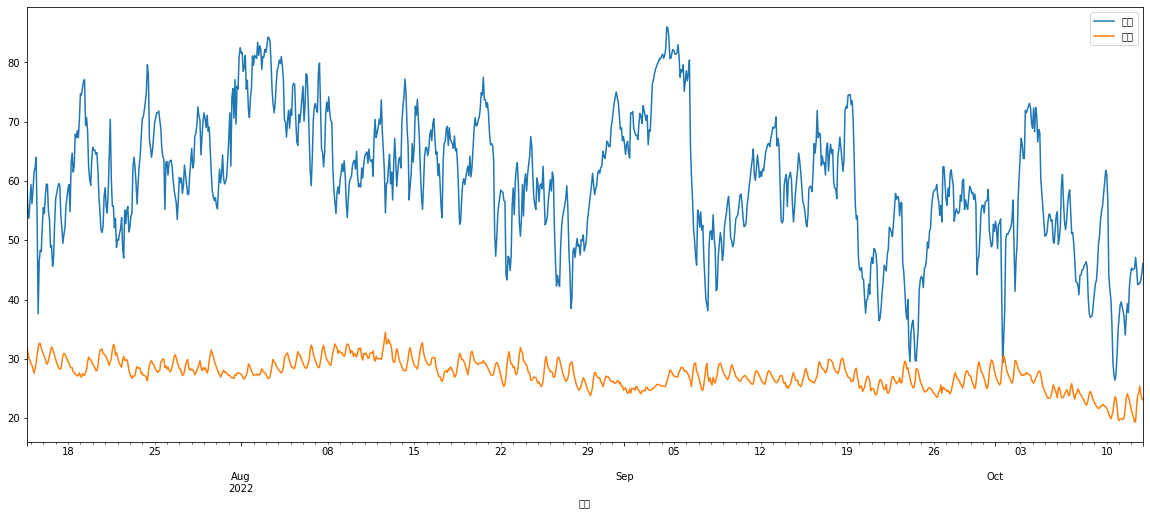

In [31]:
plt.rcParams['figure.figsize'] = [20,8]
df.plot.line(x='시간', y=['습도', '온도'])
plt.show()

In [32]:
# 데이터를 월별로 나눠서 각 월별 온도 습도 변화 추이 확인 
july = df.query('"2022-07-14" <= 시간 <= "2022-07-31"')
july

,순번,시간,HUMI,습도,TEMP,온도
0,9.0,2022-07-14 16:00:00,TC1_HUMI,60.2,TC1_TEMP,32.1
1,10.0,2022-07-14 18:00:00,TC1_HUMI,55.0,TC1_TEMP,31.0
2,11.0,2022-07-14 20:00:00,TC1_HUMI,53.7,TC1_TEMP,30.1
3,12.0,2022-07-14 22:00:00,TC1_HUMI,56.3,TC1_TEMP,29.8
4,13.0,2022-07-15 00:00:00,TC1_HUMI,59.4,TC1_TEMP,29.2
...,...,...,...,...,...,...
192,201.0,2022-07-30 16:00:00,TC1_HUMI,59.5,TC1_TEMP,27.7
193,202.0,2022-07-30 18:00:00,TC1_HUMI,60.0,TC1_TEMP,27.8
194,203.0,2022-07-30 20:00:00,TC1_HUMI,60.8,TC1_TEMP,27.5
195,204.0,2022-07-30 22:00:00,TC1_HUMI,63.8,TC1_TEMP,27.4


/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 49884 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 44036 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 49845 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 46020 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 50728 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 49884 missing from current font.
  font.set_

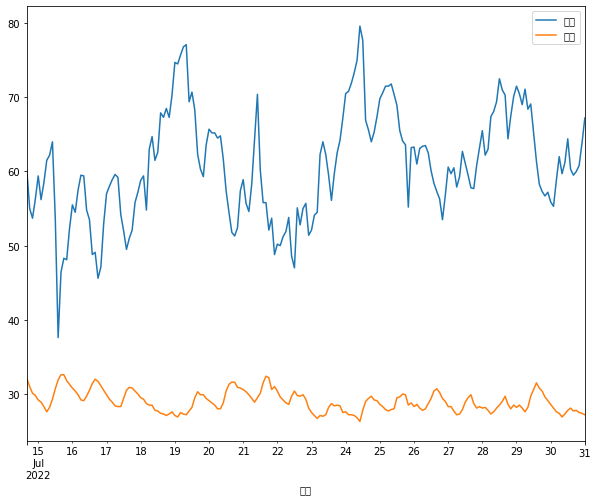

In [33]:
plt.rcParams['figure.figsize'] = [10,8]
july.plot.line(x='시간', y=['습도', '온도'])
plt.show()

In [34]:
# 8월 
august = df.query('"2022-08-01" <= 시간 <= "2022-08-31"')
august

,순번,시간,HUMI,습도,TEMP,온도
208,217.0,2022-08-01 00:00:00,TC1_HUMI,81.6,TC1_TEMP,27.4
209,218.0,2022-08-01 02:00:00,TC1_HUMI,81.7,TC1_TEMP,27.2
210,219.0,2022-08-01 04:00:00,TC1_HUMI,78.5,TC1_TEMP,26.7
211,220.0,2022-08-01 06:00:00,TC1_HUMI,79.2,TC1_TEMP,26.6
212,221.0,2022-08-01 08:00:00,TC1_HUMI,81.2,TC1_TEMP,26.9
...,...,...,...,...,...,...
564,573.0,2022-08-30 16:00:00,TC1_HUMI,66.4,TC1_TEMP,27.0
565,574.0,2022-08-30 18:00:00,TC1_HUMI,65.8,TC1_TEMP,26.8
566,575.0,2022-08-30 20:00:00,TC1_HUMI,65.8,TC1_TEMP,26.4
567,576.0,2022-08-30 22:00:00,TC1_HUMI,69.0,TC1_TEMP,26.2


/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 49884 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 44036 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 49845 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 46020 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 50728 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 49884 missing from current font.
  font.set_

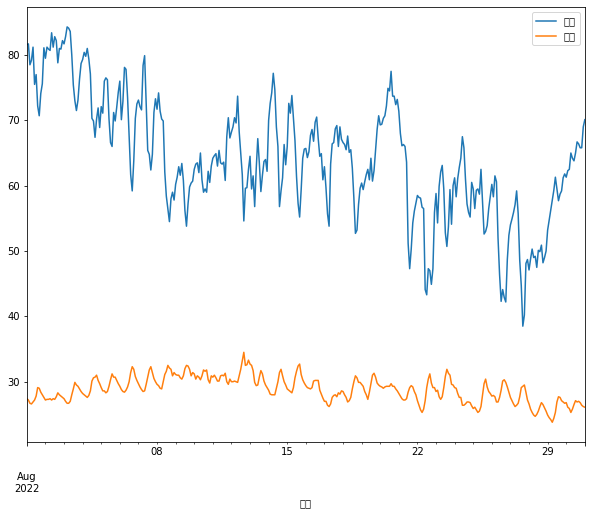

In [35]:
plt.rcParams['figure.figsize'] = [10,8]
aug = august.plot.line(x='시간', y=['습도', '온도'])
plt.show(aug)

In [36]:
# 9월 
sep = df.query('"2022-09-01" <= 시간 <= "2022-09-30"')
sep

,순번,시간,HUMI,습도,TEMP,온도
580,589.0,2022-09-01 00:00:00,TC1_HUMI,66.3,TC1_TEMP,25.0
581,590.0,2022-09-01 02:00:00,TC1_HUMI,64.5,TC1_TEMP,25.1
582,591.0,2022-09-01 04:00:00,TC1_HUMI,66.1,TC1_TEMP,24.5
583,592.0,2022-09-01 06:00:00,TC1_HUMI,66.7,TC1_TEMP,24.2
584,593.0,2022-09-01 08:00:00,TC1_HUMI,64.7,TC1_TEMP,24.3
...,...,...,...,...,...,...
924,933.0,2022-09-29 16:00:00,TC1_HUMI,47.4,TC1_TEMP,29.5
925,934.0,2022-09-29 18:00:00,TC1_HUMI,50.8,TC1_TEMP,28.7
926,935.0,2022-09-29 20:00:00,TC1_HUMI,54.9,TC1_TEMP,28.0
927,936.0,2022-09-29 22:00:00,TC1_HUMI,55.9,TC1_TEMP,27.6


<function matplotlib.pyplot.show(*args, **kw)>

/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 49884 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 44036 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 49884 missing from current font.
  font.set_text(s, 0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 44036 missing from current font.
  font.set_text(s, 0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 49845 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 46020 missing from current font.
  font.set_text

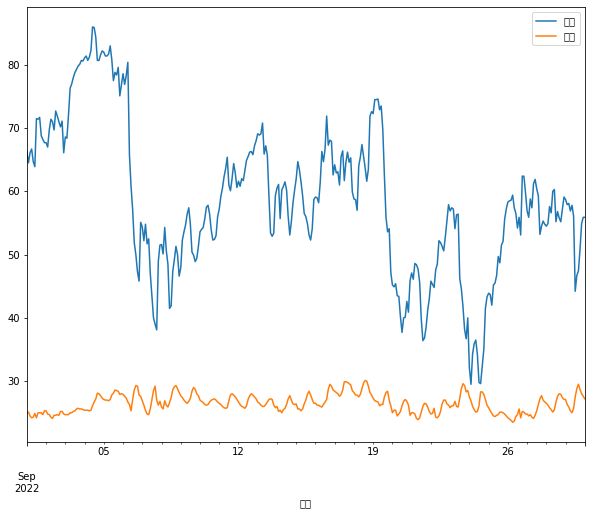

In [37]:
plt.rcParams['figure.figsize'] = [10,8]
sep.plot.line(x='시간', y=['습도', '온도'])
plt.show

In [38]:
# 10월 
oct = df.query('"2022-10-01" <= 시간 <= "2022-10-31"')
oct

,순번,시간,HUMI,습도,TEMP,온도
940,949.0,2022-10-01 00:00:00,TC1_HUMI,53.2,TC1_TEMP,27.2
941,950.0,2022-10-01 02:00:00,TC1_HUMI,52.1,TC1_TEMP,26.7
942,951.0,2022-10-01 04:00:00,TC1_HUMI,48.6,TC1_TEMP,26.2
943,952.0,2022-10-01 06:00:00,TC1_HUMI,52.7,TC1_TEMP,25.9
944,953.0,2022-10-01 08:00:00,TC1_HUMI,52.9,TC1_TEMP,25.6
...,...,...,...,...,...,...
1079,1088.0,2022-10-12 14:00:00,TC1_HUMI,42.7,TC1_TEMP,24.1
1080,1089.0,2022-10-12 16:00:00,TC1_HUMI,42.7,TC1_TEMP,25.4
1081,1090.0,2022-10-12 18:00:00,TC1_HUMI,43.2,TC1_TEMP,24.1
1082,1091.0,2022-10-12 20:00:00,TC1_HUMI,44.4,TC1_TEMP,23.3


<function matplotlib.pyplot.show(*args, **kw)>

/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 49884 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 44036 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 49884 missing from current font.
  font.set_text(s, 0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 44036 missing from current font.
  font.set_text(s, 0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 49845 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 46020 missing from current font.
  font.set_text

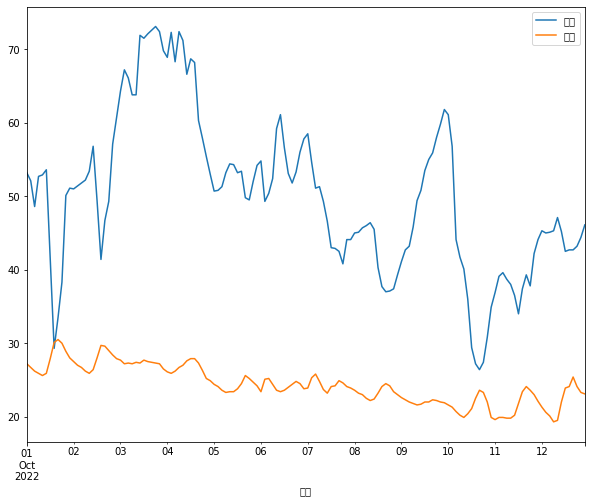

In [39]:
plt.rcParams['figure.figsize'] = [10,8]
oct.plot.line(x='시간', y=['습도', '온도'])
plt.show

### 일자/시간 데이터 분리 및 시각화

In [40]:
# 시간데이터를 날짜 컬럼, 시간 컬럼으로 분리 
#df['검사일자'] = [d.date() for d in df['시간']]
#df['시간'] = [d.time() for d in df['시간']] 

df['검사일자'] = df['시간'].dt.date 
df['시간'] = df['시간'].dt.time
df.dtypes

순번      float64
시간       object
HUMI     object
습도      float64
TEMP     object
온도      float64
검사일자     object
dtype: object

In [41]:
# 온습도 데이터 확인 
df

,순번,시간,HUMI,습도,TEMP,온도,검사일자
0,9.0,16:00:00,TC1_HUMI,60.2,TC1_TEMP,32.1,2022-07-14
1,10.0,18:00:00,TC1_HUMI,55.0,TC1_TEMP,31.0,2022-07-14
2,11.0,20:00:00,TC1_HUMI,53.7,TC1_TEMP,30.1,2022-07-14
3,12.0,22:00:00,TC1_HUMI,56.3,TC1_TEMP,29.8,2022-07-14
4,13.0,00:00:00,TC1_HUMI,59.4,TC1_TEMP,29.2,2022-07-15
...,...,...,...,...,...,...,...
1079,1088.0,14:00:00,TC1_HUMI,42.7,TC1_TEMP,24.1,2022-10-12
1080,1089.0,16:00:00,TC1_HUMI,42.7,TC1_TEMP,25.4,2022-10-12
1081,1090.0,18:00:00,TC1_HUMI,43.2,TC1_TEMP,24.1,2022-10-12
1082,1091.0,20:00:00,TC1_HUMI,44.4,TC1_TEMP,23.3,2022-10-12


In [42]:
# 검사일자 열을 순번 열 앞으로 옮기고자 함 
# 컬럼 이름을 numpy array로 정렬
col = df.columns.to_numpy() 
col

array(['순번', '시간', 'HUMI', '습도', 'TEMP', '온도', '검사일자'], dtype=object)

In [43]:
# 인덱스 숫자 순서를 바꿔 컬럼 순서 변경 
col = col[[0,6,1,2,3,4,5]] 
col

array(['순번', '검사일자', '시간', 'HUMI', '습도', 'TEMP', '온도'], dtype=object)

In [44]:
# 온습도 데이터 확인 
df = df[col]
df.head()

,순번,검사일자,시간,HUMI,습도,TEMP,온도
0,9.0,2022-07-14,16:00:00,TC1_HUMI,60.2,TC1_TEMP,32.1
1,10.0,2022-07-14,18:00:00,TC1_HUMI,55.0,TC1_TEMP,31.0
2,11.0,2022-07-14,20:00:00,TC1_HUMI,53.7,TC1_TEMP,30.1
3,12.0,2022-07-14,22:00:00,TC1_HUMI,56.3,TC1_TEMP,29.8
4,13.0,2022-07-15,00:00:00,TC1_HUMI,59.4,TC1_TEMP,29.2


In [45]:
df.dtypes

순번      float64
검사일자     object
시간       object
HUMI     object
습도      float64
TEMP     object
온도      float64
dtype: object

In [46]:
mean_humi = df.groupby('검사일자')['습도'].agg(**{'일별 평균 습도' : 'mean'}).reset_index()
mean_humi

,검사일자,일별 평균 습도
0,2022-07-14,56.300000
1,2022-07-15,54.008333
2,2022-07-16,53.191667
3,2022-07-17,55.375000
4,2022-07-18,63.841667
...,...,...
86,2022-10-08,41.875000
87,2022-10-09,51.416667
88,2022-10-10,37.991667
89,2022-10-11,38.633333


In [47]:
mean_humi.describe()

,일별 평균 습도
count,91.000000
mean,59.930037
std,10.004381
min,34.500000
25%,52.720833
50%,60.066667
75%,65.387500
max,82.350000


<function matplotlib.pyplot.show(*args, **kw)>

/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 44160 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 49324 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 51068 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 51088 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 44160 missing from current font.
  font.set_text(s, 0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 49324 missing from current font.
  font.set_te

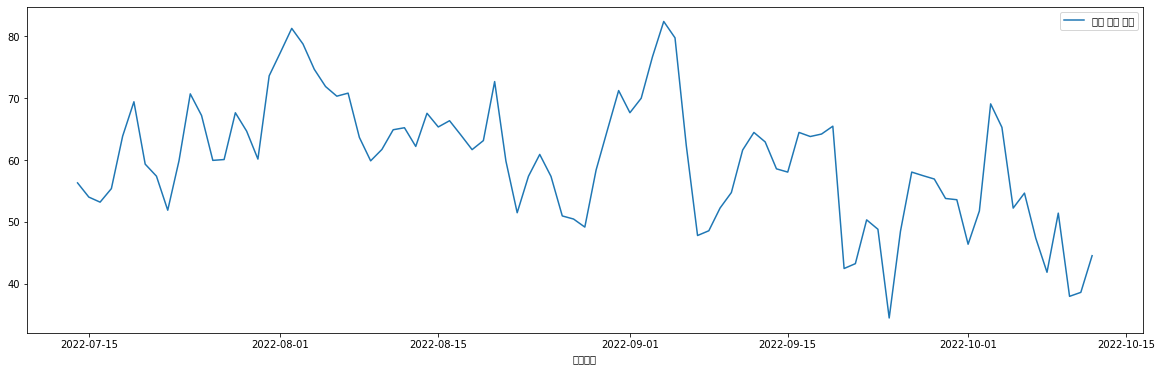

In [48]:
plt.rcParams['figure.figsize'] = [20,6]
mean_humi.plot.line(x='검사일자', y=['일별 평균 습도'])

plt.show

In [49]:
mean_temp = df.groupby('검사일자')['온도'].agg(**{'일별 평균 온도' : 'mean'}).reset_index()
mean_temp

,검사일자,일별 평균 온도
0,2022-07-14,30.750000
1,2022-07-15,30.200000
2,2022-07-16,30.525000
3,2022-07-17,29.591667
4,2022-07-18,28.058333
...,...,...
86,2022-10-08,23.275000
87,2022-10-09,22.033333
88,2022-10-10,21.375000
89,2022-10-11,21.433333


In [50]:
mean_temp.describe()

,일별 평균 온도
count,91.000000
mean,27.490751
std,2.205575
min,21.375000
25%,26.491667
50%,27.600000
75%,29.200000
max,31.575000


<function matplotlib.pyplot.show(*args, **kw)>

/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 44160 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 49324 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 51068 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 51088 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 44160 missing from current font.
  font.set_text(s, 0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 49324 missing from current font.
  font.set_te

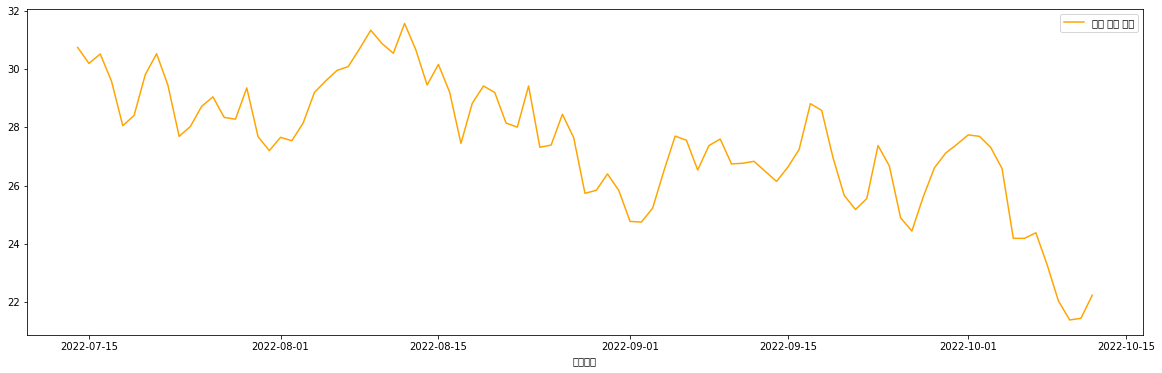

In [51]:
plt.rcParams['figure.figsize'] = [20,6]
mean_temp.plot.line(x='검사일자', y=['일별 평균 온도'], color='orange')

plt.show

In [52]:
mean_humi.head(10)

,검사일자,일별 평균 습도
0,2022-07-14,56.300000
1,2022-07-15,54.008333
2,2022-07-16,53.191667
3,2022-07-17,55.375000
4,2022-07-18,63.841667
5,2022-07-19,69.391667
6,2022-07-20,59.325000
7,2022-07-21,57.383333
8,2022-07-22,51.891667
9,2022-07-23,59.875000


In [54]:
mean_humi.dtypes

검사일자         object
일별 평균 습도    float64
dtype: object

In [55]:
# 데이터 타입 변경 (object -> datetime64)
mean_humi_change = mean_humi.astype({'검사일자' : 'datetime64'})
mean_humi_change.dtypes 

검사일자        datetime64[ns]
일별 평균 습도           float64
dtype: object

In [56]:
mean_humi = mean_humi_change
mean_humi.dtypes

검사일자        datetime64[ns]
일별 평균 습도           float64
dtype: object

In [57]:
mean_temp.dtypes

검사일자         object
일별 평균 온도    float64
dtype: object

In [58]:
mean_temp = mean_temp.astype({'검사일자':'datetime64'})
mean_temp.dtypes

검사일자        datetime64[ns]
일별 평균 온도           float64
dtype: object

In [59]:
# 데이터 합치기 (n, mean_temp)
n_merge = pd.merge(n, mean_temp, on='검사일자', how='outer')
n_merge

,배치번호,배합번호,검사일자,T10,T90,무늬,일별 평균 온도
0,25.0,3318-NFMB,2022-07-21,NaN,NaN,92.8,30.533333
1,15.0,3317-NFMB,2022-07-21,NaN,NaN,96.1,30.533333
2,5.0,3316-NFMB,2022-07-21,NaN,NaN,95.2,30.533333
3,1.0,3315-NFMB,2022-07-21,NaN,NaN,92.6,30.533333
4,9.0,3314-NFMB,2022-07-21,NaN,NaN,73.5,30.533333
...,...,...,...,...,...,...,...
218,NaN,NaN,2022-10-06,NaN,NaN,NaN,24.183333
219,NaN,NaN,2022-10-07,NaN,NaN,NaN,24.375000
220,NaN,NaN,2022-10-08,NaN,NaN,NaN,23.275000
221,NaN,NaN,2022-10-09,NaN,NaN,NaN,22.033333


In [60]:
# 데이터합치기(n_merge, mean_humi)
n_merge = pd.merge(n_merge, mean_humi, on='검사일자', how='outer')
n_merge

,배치번호,배합번호,검사일자,T10,T90,무늬,일별 평균 온도,일별 평균 습도
0,25.0,3318-NFMB,2022-07-21,NaN,NaN,92.8,30.533333,57.383333
1,15.0,3317-NFMB,2022-07-21,NaN,NaN,96.1,30.533333,57.383333
2,5.0,3316-NFMB,2022-07-21,NaN,NaN,95.2,30.533333,57.383333
3,1.0,3315-NFMB,2022-07-21,NaN,NaN,92.6,30.533333,57.383333
4,9.0,3314-NFMB,2022-07-21,NaN,NaN,73.5,30.533333,57.383333
...,...,...,...,...,...,...,...,...
218,NaN,NaN,2022-10-06,NaN,NaN,NaN,24.183333,54.650000
219,NaN,NaN,2022-10-07,NaN,NaN,NaN,24.375000,47.400000
220,NaN,NaN,2022-10-08,NaN,NaN,NaN,23.275000,41.875000
221,NaN,NaN,2022-10-09,NaN,NaN,NaN,22.033333,51.416667


In [61]:
n7_merge = pd.merge(n7, mean_temp, on='검사일자', how='outer')
n7_merge

,배치번호,배합번호,검사일자,T10,T90,무늬,일별 평균 온도
0,30.0,33619-N7FMB,2022-07-14,324.0,453.0,55.0,30.750000
1,27.0,33619-N7FMB,2022-07-14,318.0,435.0,55.4,30.750000
2,24.0,33619-N7FMB,2022-07-14,309.0,435.0,55.0,30.750000
3,21.0,33619-N7FMB,2022-07-14,313.0,453.0,,30.750000
4,3.0,33619-N7FMB,2022-07-18,310.0,453.0,57.7,28.058333
...,...,...,...,...,...,...,...
451,NaN,NaN,2022-10-04,NaN,NaN,NaN,26.583333
452,NaN,NaN,2022-10-06,NaN,NaN,NaN,24.183333
453,NaN,NaN,2022-10-07,NaN,NaN,NaN,24.375000
454,NaN,NaN,2022-10-08,NaN,NaN,NaN,23.275000


In [62]:
n7_merge = pd.merge(n7_merge, mean_temp, on='검사일자', how='outer')
n7_merge

,배치번호,배합번호,검사일자,T10,T90,무늬,일별 평균 온도_x,일별 평균 온도_y
0,30.0,33619-N7FMB,2022-07-14,324.0,453.0,55.0,30.750000,30.750000
1,27.0,33619-N7FMB,2022-07-14,318.0,435.0,55.4,30.750000,30.750000
2,24.0,33619-N7FMB,2022-07-14,309.0,435.0,55.0,30.750000,30.750000
3,21.0,33619-N7FMB,2022-07-14,313.0,453.0,,30.750000,30.750000
4,3.0,33619-N7FMB,2022-07-18,310.0,453.0,57.7,28.058333,28.058333
...,...,...,...,...,...,...,...,...
451,NaN,NaN,2022-10-04,NaN,NaN,NaN,26.583333,26.583333
452,NaN,NaN,2022-10-06,NaN,NaN,NaN,24.183333,24.183333
453,NaN,NaN,2022-10-07,NaN,NaN,NaN,24.375000,24.375000
454,NaN,NaN,2022-10-08,NaN,NaN,NaN,23.275000,23.275000


### 범위 확인

In [ ]:
df

,순번,검사일자,시간,HUMI,습도,TEMP,온도
0,9.0,2022-07-14,16:00:00,TC1_HUMI,60.2,TC1_TEMP,32.1
1,10.0,2022-07-14,18:00:00,TC1_HUMI,55.0,TC1_TEMP,31.0
2,11.0,2022-07-14,20:00:00,TC1_HUMI,53.7,TC1_TEMP,30.1
3,12.0,2022-07-14,22:00:00,TC1_HUMI,56.3,TC1_TEMP,29.8
4,13.0,2022-07-15,00:00:00,TC1_HUMI,59.4,TC1_TEMP,29.2
...,...,...,...,...,...,...,...
1079,1088.0,2022-10-12,14:00:00,TC1_HUMI,42.7,TC1_TEMP,24.1
1080,1089.0,2022-10-12,16:00:00,TC1_HUMI,42.7,TC1_TEMP,25.4
1081,1090.0,2022-10-12,18:00:00,TC1_HUMI,43.2,TC1_TEMP,24.1
1082,1091.0,2022-10-12,20:00:00,TC1_HUMI,44.4,TC1_TEMP,23.3


In [ ]:
n7[(n7['T10'] <= 260) & (n7['T10'] >= 180)]

,배치번호,배합번호,검사일자,T10,T90,무늬
18,3.0,33619-N7FMB,2022-07-19,247.0,364.0,57.0
115,5.0,33619-N7FMB,2022-08-22,259.0,385.0,59.0
123,15.0,33619-N7FMB,2022-08-23,238.0,367.0,61.9
369,1.0,33619-N7FMB,2022-10-10,253.0,371.0,59.4


In [ ]:
len(n7)

399

In [ ]:
n7.dtypes

배치번호           float64
배합번호            object
검사일자    datetime64[ns]
T10            float64
T90            float64
무늬              object
dtype: object

In [ ]:
n[(n['T10'] <= 370) & (n7['T10'] >= 290)]

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.


,배치번호,배합번호,검사일자,T10,T90,무늬
12,1.0,3307-NFMB,2022-07-25,364.0,761.0,76.6
89,3.0,3307-NFMB,2022-09-16,357.0,774.0,71.7
107,39.0,3307-NFMB,2022-09-21,207.0,802.0,74.1
109,33.0,3307-NFMB,2022-09-21,353.0,737.0,74.2
122,12.0,3307-NFMB,2022-09-21,343.0,734.0,75.1


### 그외...


In [ ]:
import matplotlib.font_manager as fm 

# 설치된 폰트 출력 
font_list = fm.findSystemFonts(fontpaths = None, fontext = 'ttf')
font_list[:]

['/usr/share/fonts/truetype/nanum/NanumSquareRoundR.ttf',
 '/usr/share/fonts/truetype/liberation/LiberationSerif-Bold.ttf',
 '/usr/share/fonts/truetype/liberation/LiberationSerif-Regular.ttf',
 '/usr/share/fonts/truetype/nanum/NanumGothic.ttf',
 '/usr/share/fonts/truetype/liberation/LiberationMono-BoldItalic.ttf',
 '/usr/share/fonts/truetype/liberation/LiberationSansNarrow-BoldItalic.ttf',
 '/usr/share/fonts/truetype/humor-sans/Humor-Sans.ttf',
 '/usr/share/fonts/truetype/liberation/LiberationMono-Regular.ttf',
 '/usr/share/fonts/truetype/liberation/LiberationSans-Bold.ttf',
 '/usr/share/fonts/truetype/liberation/LiberationSerif-BoldItalic.ttf',
 '/usr/share/fonts/truetype/liberation/LiberationSerif-Italic.ttf',
 '/usr/share/fonts/truetype/liberation/LiberationSans-BoldItalic.ttf',
 '/usr/share/fonts/truetype/nanum/NanumSquareB.ttf',
 '/usr/share/fonts/truetype/nanum/NanumSquareR.ttf',
 '/usr/share/fonts/truetype/liberation/LiberationMono-Bold.ttf',
 '/usr/share/fonts/truetype/nanum/Na